### Importing all modules

In [13]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

Measure of Frequency and Central Tendency

In [9]:
data = np.random.randint(low=1, high=20, size = 10)
freq = dict()
for num in data:
    if num not in freq:
        freq[num] = 1
    else:
        freq[num] += 1

print(data)
print(freq)
print("mean", np.mean(data))
print("median",np.median(data))
print("mode", np.argmax(np.bincount(data)))
print("expected value", np.sum(data)/10)

[ 9 18 10 17 14  5 13 13  9  3]
{9: 2, 18: 1, 10: 1, 17: 1, 14: 1, 5: 1, 13: 2, 3: 1}
mean 11.1
median 11.5
mode 9
expected value 11.1


Measures of Dispersion

In [8]:
print("range", np.ptp(data))
print("variance", np.var(data))
print("standard deviation", np.std(data))
print("Interquartile range", np.percentile(data, 75) - np.percentile(data, 25))

range 17
variance 39.81
standard deviation 6.3095166217389425
Interquartile range 10.75


Probability Distribution

Checking for various common distributions whether expected value and mean value are approximately the same or different.

In [10]:
#binomial(20,0.3)
print(20*0.3) #expected value
x = st.binom.rvs(20,0.3,size=1000)
print(np.sum(x)/1000) #average value in simulation

6.0
5.932


In [11]:
#geometric(0.3)
print(1/0.3) #expected value
x = st.geom.rvs(0.3,size=1000)
print(np.sum(x)/1000) #average value in simulation

3.3333333333333335
3.434


In [12]:
#Poisson(6)
print(6) #expected value
x = st.poisson.rvs(6,size=1000)
print(np.sum(x)/1000) #average value in simulation

6
6.003


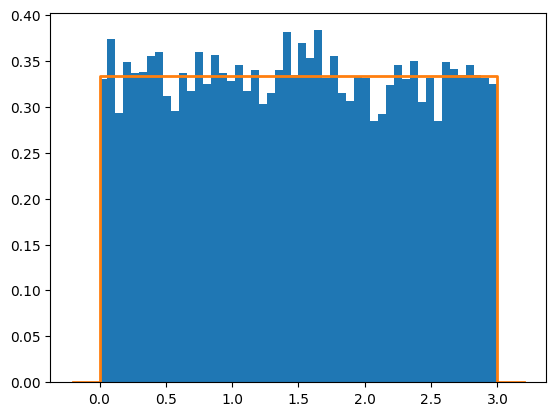

In [14]:
x = st.uniform.rvs(0,3,size=10000)
plt.hist(x,bins=50,range=(0,3),density=True) #blue histogram
plt.plot([-0.2,0,0,3,3,3.2],[0,0,1.0/3,1.0/3,0,0],lw=2) #orange line. uniform[0,3] density
plt.show()

Let us look at some continous distributions now

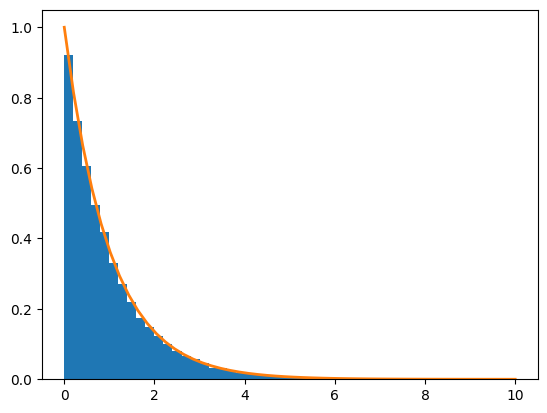

In [15]:
x = st.expon.rvs(scale=1,size=10000)
plt.hist(x,bins=50,range=(0,10),density=True) #blue histogram
xp = np.linspace(0,10,50)
plt.plot(xp,st.expon.pdf(xp,scale=1),lw=2) #orange line, exp(\lambda) density
plt.show()

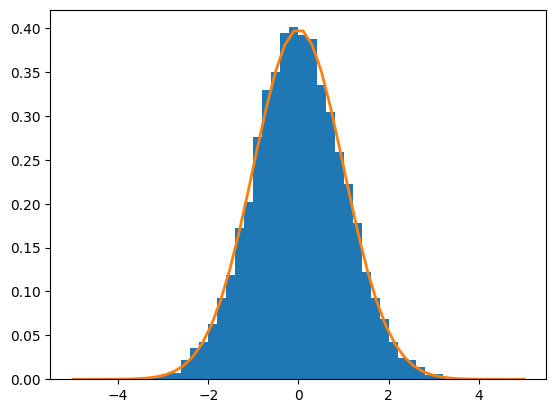

In [16]:
x = st.norm.rvs(loc=0, scale=1, size=10000)
plt.hist(x,bins=50,range=(-5,5),density=True) #blue histogram
xp = np.linspace(-5,5,50)
plt.plot(xp,st.norm.pdf(xp,loc=0,scale=1),lw=2) #orange line, normal pdf
plt.show()

Skewness and Kurtosis

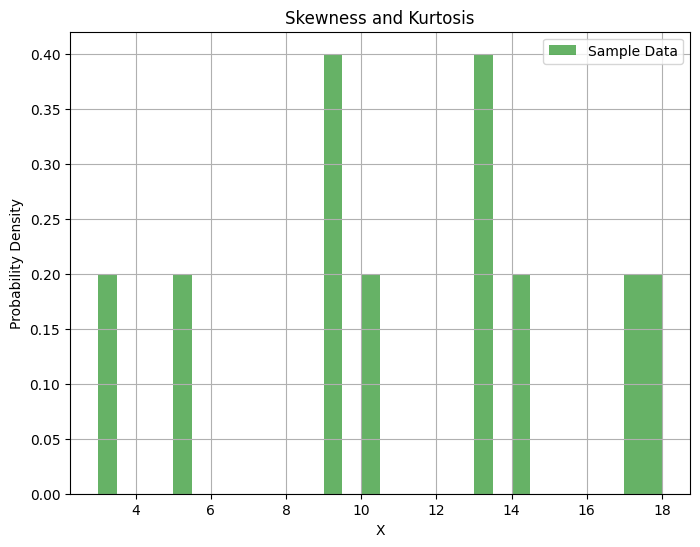

Skewness: 1.2266833855509338
Kurtosis: 1.3892502284947366


In [18]:
norm_data = np.random.normal(loc=0, scale=2, size= 1000) #loc = mu and scale = sigma
norm_data = np.concatenate((norm_data, np.random.normal(loc = 8, scale=3, size=200)))

skewness = st.skew(norm_data)
kurtosis = st.kurtosis(norm_data)

plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Sample Data')
plt.title('Skewness and Kurtosis')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

- Linear and Logistic Regression has already been implemented. 
- Continous and discrete functions in mathematics are too trivial to implement. 
- Goodness of Fit is better off implemented along with hypothesis testing. 
#### Let us move on to normality tests.

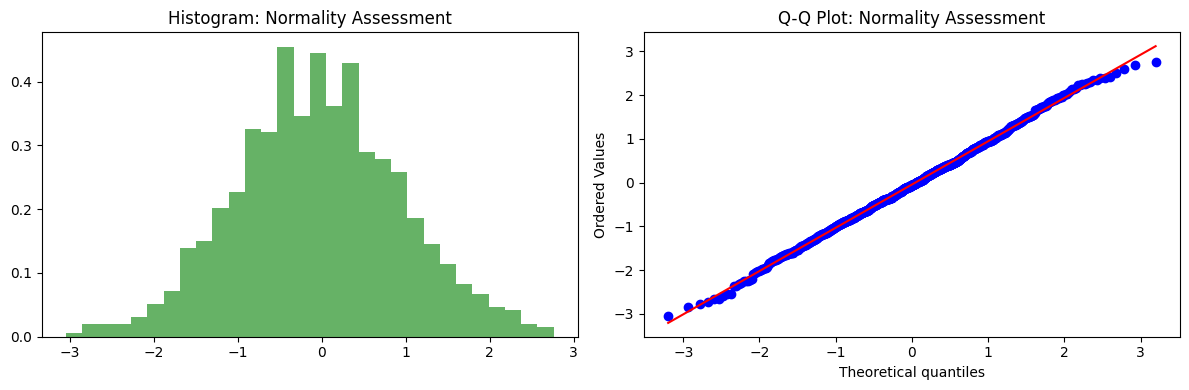

Shapiro-Wilk Test:
Test Statistic: 0.9985560774803162
P-Value: 0.5916484594345093
Kolmogorov-Smirnov Test:
Test Statistic: 0.03737519429804048
P-Value: 0.11930823166569182
The data appears to be normally distributed (fail to reject the null hypothesis).


In [19]:
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histogram: Normality Assessment')

plt.subplot(1, 2, 2)
st.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot: Normality Assessment')

plt.tight_layout()
plt.show()

#both the below tests use hypothesis testing to determine whether distribution is normal or not

shapiro_test_stat, shapiro_p_value = st.shapiro(data) 
ks_test_stat, ks_p_value = st.kstest(data, 'norm')

print("Shapiro-Wilk Test:")
print("Test Statistic:", shapiro_test_stat)
print("P-Value:", shapiro_p_value)
print("Kolmogorov-Smirnov Test:")
print("Test Statistic:", ks_test_stat)
print("P-Value:", ks_p_value)

alpha = 0.05 #alpha is assumed 
if shapiro_p_value > alpha and ks_p_value > alpha:
    print("The data appears to be normally distributed (fail to reject the null hypothesis).")
else:
    print("The data does not appear to be normally distributed (reject the null hypothesis).")


Since ANOVA is yet unknown, will try to implement it later.
Let us look at Homoscedasticity.
> Homoscedasticity refers to the uniformness of the average from the best fitted line or any other reference. In Heteroscedasticity, the average of the distance of the points from the line keeps on changing. 

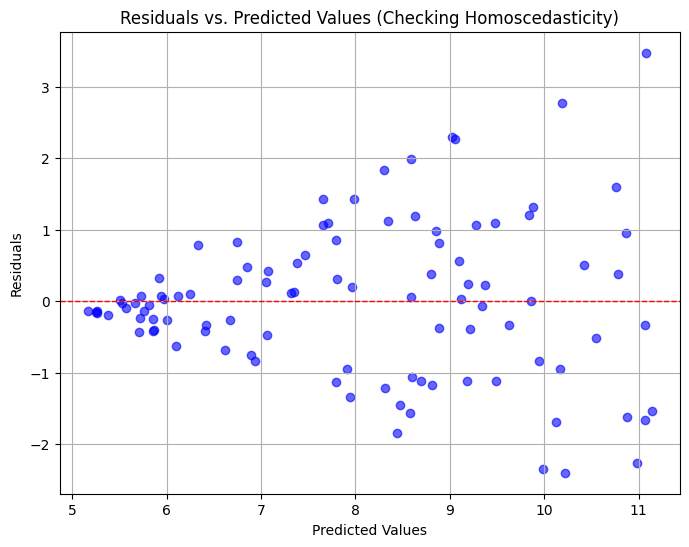

Breusch-Pagan Test P-Value: 5.292829354268214e-07
The data shows evidence of heteroscedasticity (reject the null hypothesis).


In [20]:
import statsmodels.api as sm

# Generate sample data 
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 5 + 3 * X + np.random.normal(loc=0, scale=X, size=(100, 1))

X_with_const = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X_with_const).fit()

# Get residuals and predicted values
residuals = model.resid
predicted_values = model.fittedvalues


plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, color='b', alpha=0.6)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (Checking Homoscedasticity)')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.grid(True)
plt.show()


from statsmodels.stats.diagnostic import het_breuschpagan
_, p_value, _, _ = het_breuschpagan(residuals, X_with_const)
print("Breusch-Pagan Test P-Value:", p_value)


alpha = 0.05
if p_value < alpha:
    print("The data shows evidence of heteroscedasticity (reject the null hypothesis).")
else:
    print("The data does not show evidence of heteroscedasticity (fail to reject the null hypothesis).")


Linear and Non-Linear relationship with Regression

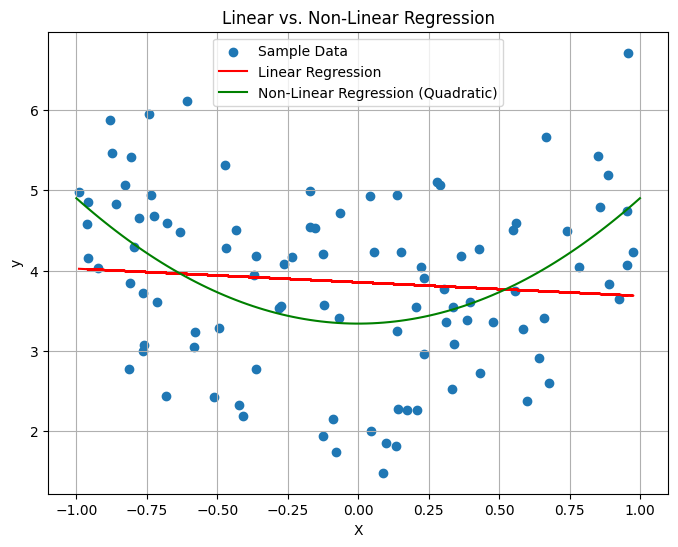

In [22]:
np.random.seed(0)
X = 2 * np.random.rand(100, 1) - 1
y = 2 * X**2 + 3 + np.random.randn(100, 1)  # Quadratic relationship with noise

X_with_const = sm.add_constant(X)

linear_model = sm.OLS(y, X_with_const).fit()

X_square = X ** 2
X_square_with_const = sm.add_constant(X_square)
non_linear_model = sm.OLS(y, X_square_with_const).fit()

plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Sample Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear vs. Non-Linear Regression')
plt.grid(True)

plt.plot(X, linear_model.predict(X_with_const), color='r', label='Linear Regression')

x_vals = np.linspace(-1, 1, 100)
x_square_vals = x_vals ** 2
x_square_vals_with_const = sm.add_constant(x_square_vals)
plt.plot(x_vals, non_linear_model.predict(x_square_vals_with_const), color='g', label='Non-Linear Regression (Quadratic)')

plt.legend()
plt.show()


### Inferential Statistics
t test

- (n-1) / (sigma) ^ 2 S^2 follows Chi square distribution.
- Xbar - mu / S / sqrt(n) follows t distribution.